# Advanced Presentation - SQLite

##### Group 3: Yuke Wu, Chang Liu
##### 2020-09-26

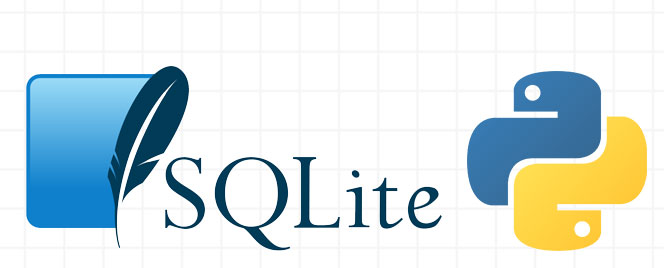

In [ ]:
#What is SQLite?

In [ ]:
#SQLite is an embedded database software for local or client storage in application software such as web browsers. 
#It’s a widely deployed database engine.
#It’s a widely deployed database engine.

In [ ]:
#The usage of SQLite

In [ ]:
#SQLite can be used to create a database, define tables, insert and change rows, run queries and manage SQLite database files.
#SQLite provide us local data storage for individual applications and devices.

In [ ]:
#Is SQLite in Python Standard Library?

In [ ]:
# Yes, by using import command

In [2]:
import sqlite3 as lite

In [3]:
conn = lite.connect('company.db')
with conn:
    conn.execute('''
    CREATE TABLE employee (
    name TEXT,
    age INTEGER,
    department TEXT,
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT);
    ''')

In [4]:
sql = 'insert into employee (id, name, age, department) values(?, ?, ?, ?)'
datas = [
    (1, 'John', 20, 'Sales'),
    (2, 'Dan', 18, 'Sales'),
    (3, 'James', 25, 'IT'),
    (4, 'Amy', 27, 'IT'),
    (5, 'Ron', 24, 'HR')
]
with conn:
    conn.executemany(sql, datas)

In [89]:
with conn:
    datas = conn.execute("select * from employee")
    for data in datas:
        print(data)

('John', 20, 'Sales', 1)
('Dan', 18, 'Sales', 2)
('James', 25, 'IT', 3)
('Amy', 27, 'IT', 4)
('Ron', 24, 'HR', 5)


In [90]:
# Wirte a SQL to query the employee names and their departments which their departments are 'sales' and 'IT'
# method 1
with conn:
    datas = conn.execute("select name,department from employee where department in ('Sales','IT')")
    for data in datas:
        print(data)

('John', 'Sales')
('Dan', 'Sales')
('James', 'IT')
('Amy', 'IT')


In [91]:
# method 2
# Sets the row_factory to the callable sqlite3.Row, which converts the plain tuple into a more useful object.
conn.row_factory = lite.Row
with conn:
    datas = conn.execute("select * from employee where department in ('Sales','IT')")
    for data in datas:
        print(data['name'],data['department'])

John Sales
Dan Sales
James IT
Amy IT


In [92]:
with conn:
    conn.execute('''
    CREATE TABLE info (
    e_id INTEGER,
    salary integer,
    id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT);
    ''')
    sql = 'insert into info (e_id, salary) values(?, ?)'
    datas = [
    (1, 70000),
    (2, 60000),
    (3, 55000),
    (4, 75000),
    (5, 50000)
    ]
    conn.executemany(sql, datas)

In [94]:
# Wirte a SQL to query the employee names and their corresponding salaries
with conn:
    sql = 'select e.name as name, i.salary as salary from employee e inner join info i on e.id=i.e_id'
    datas = conn.execute(sql)
    for data in datas:
        print(f'the salary of {data["name"]}：{data["salary"]}')

the salary of John：70000
the salary of Dan：60000
the salary of James：55000
the salary of Amy：75000
the salary of Ron：50000


In [73]:
with conn:
    conn.execute("delete from employee where department = 'HR'")

In [85]:
conn.execute('DROP TABLE employee')

In [86]:
conn.execute('DROP TABLE info')

In [ ]:
#SQLite is almost always a better solution for device-local storage with low writer concurrency and less than a terabyte of content.
#SQLite is fast and reliable and it requires no configuration or maintenance. 

In [ ]:
#Scenarios that SQLite works well:

In [ ]:
#Embedded devices:
#Because an SQLite database requires no administration, it works well in devices that must operate without expert human support. 

In [ ]:
#Embedded devices
#Because an SQLite database requires no administration, it works well in devices that must operate without expert human support. 